In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,797 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120901 files and dire

In [1]:
!git clone https://github.com/gyubinc/Hwaseong_Population_Forecasting.git

Cloning into 'Hwaseong_Population_Forecasting'...
remote: Enumerating objects: 563, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 563 (delta 0), reused 0 (delta 0), pack-reused 562
Receiving objects: 100% (563/563), 1.41 MiB | 4.66 MiB/s, done.
Resolving deltas: 100% (356/356), done.


In [ ]:
!pwd

/content


In [2]:
%cd Hwaseong_Population_Forecasting

/content/Hwaseong_Population_Forecasting


## Colab 클론 호환 체크

---



In [ ]:
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.6/188.6 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.8/218.8 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.3 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8791 sha256=fabf4ca2f49f9226675ee8e2383f1c57503d86348c3956c2de3740d0a67b4c83
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
!python main.py

Traceback (most recent call last):
  File "/content/Hwaseong_Population_Forecasting/main.py", line 2, in <module>
    from code.train import LSTM_train, Transformer_train, uni_Transformer, multi_Transformer
  File "/content/Hwaseong_Population_Forecasting/code/train.py", line 10, in <module>
    from transformers import TimeSeriesTransformerConfig, TimeSeriesTransformerModel
ModuleNotFoundError: No module named 'transformers'


### AR multi-step 예측 평가 및 잔차 검정


### 데이터 로드 및 사용자 지정 함수 설정

In [1]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [2]:
# arguments.py에서 # 모든 path를 '/content/Hwaseong_data.xlsx'로 바꿔줘야 함
import pandas as pd
import argparse
from Hwaseong_Population_Forecasting.code.arguments import get_args

#args = get_args()
#data = pd.read_excel(args.train_path)
data = pd.read_excel("/content/찐 최종 데이터.xlsx")
data

,월별,총인구,내국인,외국인,등록외국인,외국국적동포,지가지수,지가변동률_수도권,지가변동률_화성시,매매가격지수_아파트_수도권,...,지가변동률 _농촌생활권,지가변동률_도시생활이용권,지가변동률 _도시생활권,0세_19세 총인구,20세_39세 총인구,40세_59세 총인구,60세 이상_총인구,총인구_농촌생활권,총인구_도시생활이용권,총인구_도시생활권
0,2014-03-01,719,744,-25,-66,41,0.093,0.073,0.122,0.083,...,0.0000,0.000000,0.000000,338,214,110,81,216,343,556
1,2014-04-01,295,-29,324,380,-56,-0.031,-0.037,-0.040,-0.322,...,0.0000,0.000000,0.000000,52,-120,-3,40,366,266,-102
2,2014-05-01,112,-45,157,166,-9,0.187,-0.027,0.244,-0.059,...,0.0000,0.000000,0.000000,-38,98,-124,20,132,186,269
3,2014-06-01,-245,-70,-175,-173,-2,-0.049,-0.019,-0.064,0.014,...,0.0000,0.000000,0.000000,-39,30,-28,-32,234,176,-162
4,2014-07-01,-220,-83,-137,-144,7,-0.110,0.020,-0.143,0.029,...,0.0000,0.000000,0.000000,166,-1,-204,-43,255,298,-226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,2022-12-01,-836,-835,-1,9,-10,-0.094,-0.029,-0.093,-1.111,...,-0.0254,-0.106000,-0.097088,-238,-423,-103,-74,1260,1349,-116
106,2023-01-01,297,830,-533,-509,-24,-0.011,0.003,-0.013,1.174,...,-0.0260,-0.018333,-0.022588,495,-79,437,-26,433,441,2565
107,2023-02-01,977,679,298,281,17,-0.002,0.021,0.000,0.721,...,-0.0110,0.014000,0.004500,125,196,353,11,188,241,1124
108,2023-03-01,-972,-999,27,-4,31,0.004,0.034,0.003,0.686,...,-0.0044,-0.005333,0.002588,-644,650,-1023,16,372,472,-1414


In [3]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def resid_test(resid):

  print('Ljung-Box 검정 결과\n')
  alpha = 0.05
  lb_result = acorr_ljungbox(resid, lags=11)
  print(lb_result)
  p_values = lb_result['lb_pvalue']
  significant_lags = np.where(p_values < alpha)[0] + 1  # 유의미한 시차 구하기
  if len(significant_lags) > 0:
      print("\n잔차는 White Noise가 아닙니다.\n")
      print(f"유의미한 자기상관이 발견된 시차: {significant_lags}")
  else:
      print("\n잔차는 White Noise입니다.\n(유의한 자기상관 시차가 발견되지 않음) \n")

  fig, axes = plt.subplots(1, 2, figsize=(9, 3))

  # ACF 그래프
  plot_acf(resid, lags=11, ax=axes[0])
  axes[0].set_title('ACF Plot')

  # PACF 그래프
  plot_pacf(resid, lags=5, ax=axes[1])
  axes[1].set_title('PACF Plot')

  plt.tight_layout()
  plt.show()

In [4]:
import scipy as sp
import seaborn as sns

def reg_diagnosis(resid, prediction, valid):
  plt.rc('axes', labelsize=12)
  plt.rc('xtick', labelsize=10)
  plt.rc('ytick', labelsize=10)
  plt.rc('figure', titlesize=10)
  figure, axs = plt.subplots(1,3, figsize = (12,3))
  plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.35, hspace=0.35)

  sp.stats.probplot(resid, dist='norm', fit=True, plot=axs[0])

  sns.distplot(x = resid , ax = axs[1])
  axs[1].set_xlabel("Residuals")
  axs[1].set_title("Residuals Histogram")

  temp = pd.concat( [ prediction, valid ], axis = 1)
  temp.columns = [ "prediction", "valid" ]

  sns.residplot(x = "prediction", y = "valid",
              data = temp,
              scatter_kws = {'edgecolor':"white", "alpha":0.7},
              line_kws = {"color":"red"},
              ax = axs[2])

  MSE_sq = np.sqrt(((prediction - valid) ** 2).mean())

  # 잔차도 MSE line
  for i, c in enumerate(["red", "green", "black"]):
    axs[2].axhline( (i+1) * MSE_sq, color = c)
    axs[2].axhline( -(i+1) * MSE_sq, color = c)

    axs[2].text(650, (i+1) * MSE_sq, f"{i+1}"r'${}\sqrt{MSE}$')
    axs[2].text(650, -(i+1) * MSE_sq, f"-{i+1}"r'${}\sqrt{MSE}$')

  axs[2].set_xlabel("Fitted Values")
  axs[2].set_ylabel("Standardized Residuals")
  axs[2].set_title("Residuals Diagram")

  plt.show()

In [5]:
y_total = data.set_index('월별')[['총인구']]
y_total

,총인구
월별,
2014-03-01,719
2014-04-01,295
2014-05-01,112
2014-06-01,-245
2014-07-01,-220
...,...
2022-12-01,-836
2023-01-01,297
2023-02-01,977


<Axes: xlabel='월별'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


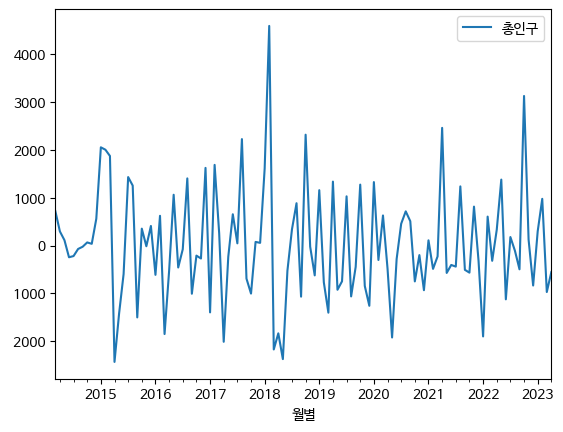

In [6]:
y_total.plot()

In [7]:
y_train = y_total[:-12]
y_valid = y_total[-12:]
print(y_train, y_valid)

             총인구
월별              
2014-03-01   719
2014-04-01   295
2014-05-01   112
2014-06-01  -245
2014-07-01  -220
...          ...
2021-12-01  -318
2022-01-01 -1901
2022-02-01   605
2022-03-01  -319
2022-04-01   329

[98 rows x 1 columns]              총인구
월별              
2022-05-01  1379
2022-06-01 -1125
2022-07-01   178
2022-08-01  -110
2022-09-01  -497
2022-10-01  3128
2022-11-01   123
2022-12-01  -836
2023-01-01   297
2023-02-01   977
2023-03-01  -972
2023-04-01  -554


### AR(4) 베이스라인 모델 검정

In [8]:
import warnings
import statsmodels
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("default")
model = statsmodels.tsa.arima.model.ARIMA(y_train.values, order = (4,0,0))
model_fit = model.fit()
model_fit.summary()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen imp

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   98
Model:                 ARIMA(4, 0, 0)   Log Likelihood                -824.470
Date:                Tue, 12 Sep 2023   AIC                           1660.941
Time:                        09:04:20   BIC                           1676.451
Sample:                             0   HQIC                          1667.214
                                 - 98                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2755     73.398      0.140      0.889    -133.583     154.134
ar.L1         -0.1192      0.103     -1.153      0.249      -0.322       0.083
ar.L2         -0.2702      0.113     -2.382      0.017      -0.493      -0.048
ar.L3         -0.1382      0.103     -1.341      0.180      -0.340       0.064
ar.L4         -0.3121      0.110     -2.838      0.005      -0.528      -0.097
sigma2      1.225e+06   1.63e+05      7.518      0.000    9.06e+05    1.54e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                35.20
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             1.00
Prob(H) (two-sided):                  0.34   Kurtosis:                         5.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
prediction = model_fit.get_forecast(12)
prediction.predicted_mean

array([ 575.58715473, -283.31876254,  -48.7738642 ,  -80.92408885,
        -98.76375075,  147.69529216,   54.3946099 ,   11.41151759,
         13.262039  ,  -39.36907679,    1.45784892,   23.97390528])

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


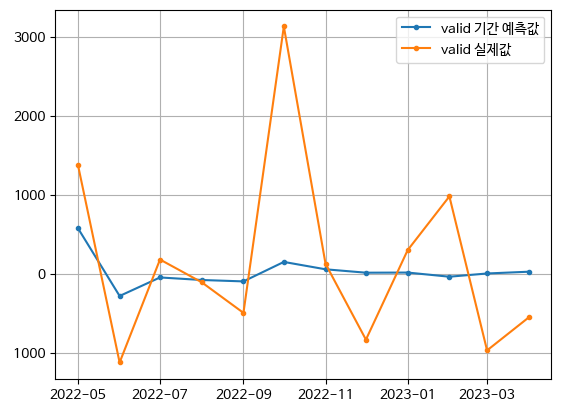

In [10]:
ar4_pred = pd.Series(prediction.predicted_mean)
ar4_pred.index = y_valid['총인구'].index

plt.plot(ar4_pred, label='valid 기간 예측값', marker='.')
plt.plot(y_valid['총인구'], label='valid 실제값', marker='.')
plt.legend()
plt.grid(True)
plt.show()

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


Residuals: 월별
2022-05-01    -803.412845
2022-06-01     841.681237
2022-07-01    -226.773864
2022-08-01      29.075911
2022-09-01     398.236249
2022-10-01   -2980.304708
2022-11-01     -68.605390
2022-12-01     847.411518
2023-01-01    -283.737961
2023-02-01   -1016.369077
2023-03-01     973.457849
2023-04-01     577.973905
dtype: float64
MAE: 753.9200429047972
RMSE: 1063.209758647505
R-sqaured: 0.14801192077865633


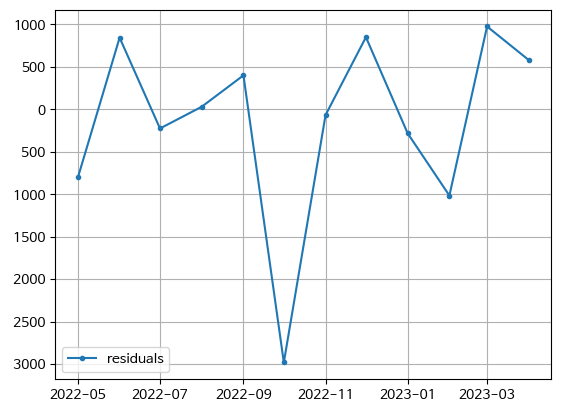

In [11]:
import numpy as np
from sklearn.metrics import r2_score

ar4_rmse = np.sqrt(((ar4_pred - y_valid['총인구']) ** 2).mean())
ar4_mae = np.abs(ar4_pred - y_valid['총인구']).mean()
ar4_r2 = r2_score(y_valid['총인구'], ar4_pred)
ar4_resid = ar4_pred - y_valid['총인구']

print("Residuals:", ar4_resid)
print("MAE:", ar4_mae)
print("RMSE:",ar4_rmse)
print("R-sqaured:", ar4_r2)

plt.plot(ar4_resid, label='residuals', marker='.')
plt.legend()
plt.grid(True)
plt.show()

Ljung-Box 검정 결과

     lb_stat  lb_pvalue
1   0.543851   0.460841
2   2.671071   0.263017
3   3.352391   0.340417
4   3.357728   0.499838
5   3.769983   0.582985
6   3.837421   0.698667
7   3.841039   0.797894
8   3.969598   0.859856
9   4.793003   0.851966
10  4.793380   0.904546
11  5.008041   0.930777

잔차는 White Noise입니다.
(유의한 자기상관 시차가 발견되지 않음) 



<ipython-input-3-cd67ad3bdb4a>:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


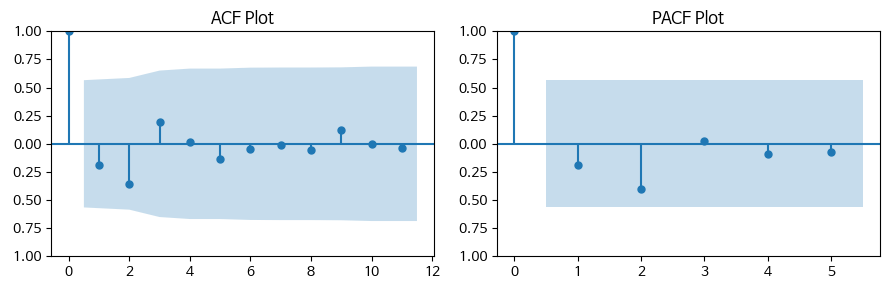

In [12]:
resid_test(ar4_resid)

<ipython-input-4-8704a21cdbb8>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = resid , ax = axs[1])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


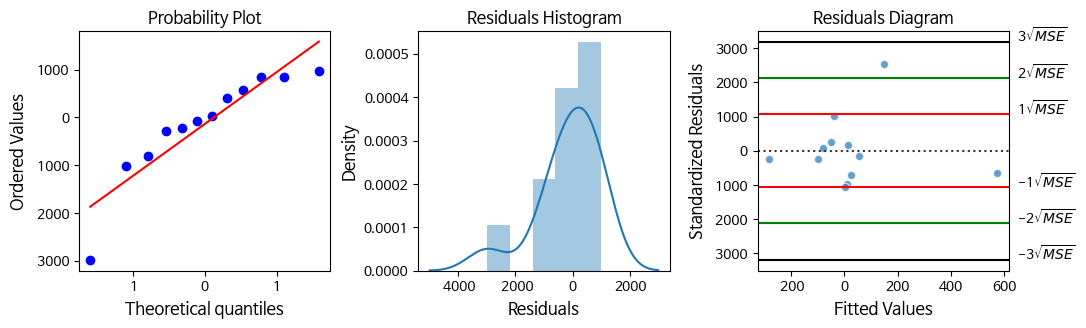

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [13]:
reg_diagnosis(ar4_resid, ar4_pred, y_valid['총인구'])

### 최적 ARIMA 파라미터 탐색 및 결과 검정

In [15]:
!pip install pmdarima

In [16]:
from pmdarima import auto_arima

arima_model = auto_arima(y_train, seasonal=True, m=12, stepwise=True, trace=True, stationary=True,
                   start_p=4, start_q=0, start_P=0, start_Q=0, max_p=11, max_q=11,
                   maxiter=100, max_order= 20, information_criterion='aic')

# 최적 모델의 요약 정보 출력
print(arima_model.summary())

<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


Performing stepwise search to minimize aic
 ARIMA(4,0,0)(0,0,0)[12] intercept   : AIC=1660.941, Time=0.38 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1668.467, Time=0.09 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1669.136, Time=0.24 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=1669.172, Time=0.89 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1666.474, Time=0.08 sec
 ARIMA(4,0,0)(1,0,0)[12] intercept   : AIC=1659.875, Time=0.85 sec
 ARIMA(4,0,0)(2,0,0)[12] intercept   : AIC=1661.875, Time=1.75 sec
 ARIMA(4,0,0)(1,0,1)[12] intercept   : AIC=1661.875, Time=1.61 sec
 ARIMA(4,0,0)(0,0,1)[12] intercept   : AIC=1659.896, Time=1.89 sec
 ARIMA(4,0,0)(2,0,1)[12] intercept   : AIC=1663.874, Time=2.28 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=1667.642, Time=0.61 sec
 ARIMA(5,0,0)(1,0,0)[12] intercept   : AIC=1659.910, Time=0.93 sec
 ARIMA(4,0,1)(1,0,0)[12] intercept   : AIC=1660.337, Time=2.58 sec
 ARIMA(3,0,1)(1,0,0)[12] intercept   : AIC=1662.848, Time=5.78 sec
 ARIMA(5,0,1)(1,0,0

In [17]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   98
Model:               SARIMAX(5, 0, 1)   Log Likelihood                -820.290
Date:                Tue, 12 Sep 2023   AIC                           1654.581
Time:                        09:06:53   BIC                           1672.675
Sample:                    03-01-2014   HQIC                          1661.900
                         - 04-01-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8883      0.199     -4.460      0.000      -1.279      -0.498
ar.L2         -0.3818      0.117     -3.262      0.001      -0.611      -0.152
ar.L3         -0.3831      0.134     -2.851      0.004      -0.647      -0.120
ar.L4         -0.4322      0.124     -3.499      0.000      -0.674      -0.190
ar.L5         -0.4104      0.087     -4.702      0.000      -0.582      -0.239
ma.L1          0.7738      0.189      4.102      0.000       0.404       1.144
sigma2      1.079e+06   1.48e+05      7.311      0.000     7.9e+05    1.37e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                23.65
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.67   Skew:                             0.91
Prob(H) (two-sided):                  0.25   Kurtosis:                         4.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
arima_pred = arima_model.predict(12)
arima_pred

2022-05-01    594.526170
2022-06-01    -12.785509
2022-07-01   -452.093535
2022-08-01    167.400177
2022-09-01   -363.202400
2022-10-01    193.431313
2022-11-01    103.380008
2022-12-01     86.661654
2023-01-01   -102.266543
2023-02-01     83.602231
2023-03-01   -192.492091
2023-04-01     98.355997
Freq: MS, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


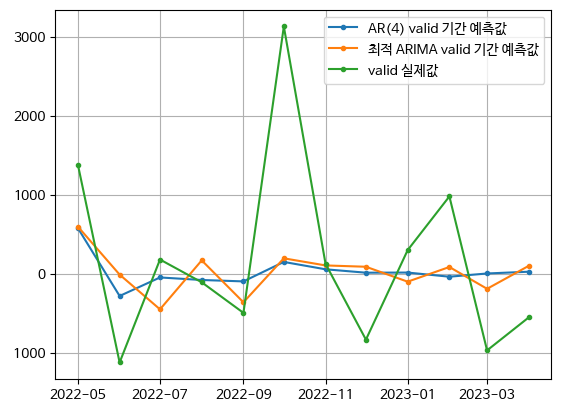

In [19]:
plt.plot(ar4_pred, label='AR(4) valid 기간 예측값', marker='.')
plt.plot(arima_pred, label='최적 ARIMA valid 기간 예측값', marker='.')
plt.plot(y_valid, label='valid 실제값', marker='.')
plt.legend()
plt.grid(True)
plt.show()

Residuals: 2022-05-01    -784.473830
2022-06-01    1112.214491
2022-07-01    -630.093535
2022-08-01     277.400177
2022-09-01     133.797600
2022-10-01   -2934.568687
2022-11-01     -19.619992
2022-12-01     922.661654
2023-01-01    -399.266543
2023-02-01    -893.397769
2023-03-01     779.507909
2023-04-01     652.355997
Freq: MS, dtype: float64
MAE: 794.9465152836178
RMSE: 1072.3202220713401
R-sqaured: 0.1333482820659707


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


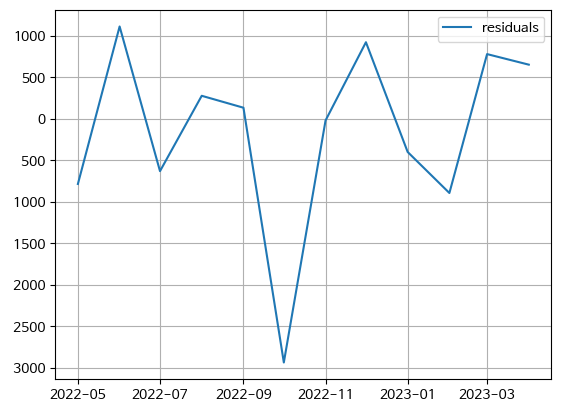

In [20]:
import numpy as np
arima_rmse = np.sqrt(((arima_pred - y_valid['총인구']) ** 2).mean())
arima_mae = np.abs(arima_pred - y_valid['총인구']).mean()
arima_r2 = r2_score(y_valid['총인구'], arima_pred)
arima_resid = arima_pred - y_valid['총인구']

print("Residuals:", arima_resid)
print("MAE:", arima_mae)
print("RMSE:", arima_rmse)
print("R-sqaured:", arima_r2)

plt.plot(arima_resid, label='residuals')
plt.legend()
plt.grid(True)
plt.show()

Ljung-Box 검정 결과

     lb_stat  lb_pvalue
1   0.534281   0.464812
2   2.908000   0.233634
3   3.938510   0.268181
4   3.949959   0.412821
5   4.199946   0.521003
6   4.323031   0.633050
7   4.323084   0.741903
8   4.502813   0.809152
9   4.986800   0.835457
10  5.067608   0.886616
11  5.305538   0.915471

잔차는 White Noise입니다.
(유의한 자기상관 시차가 발견되지 않음) 



<ipython-input-3-cd67ad3bdb4a>:28: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


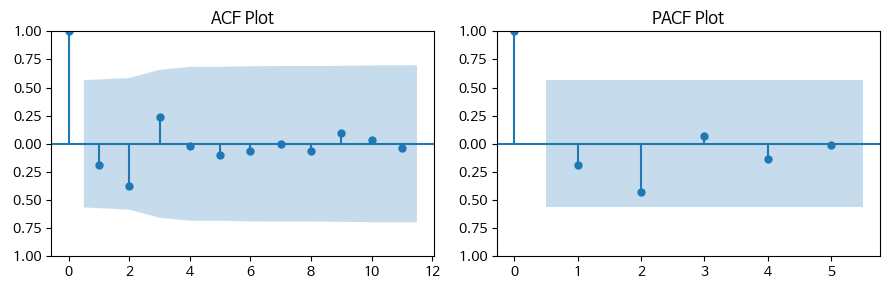

In [21]:
resid_test(arima_resid)

<ipython-input-4-8704a21cdbb8>:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = resid , ax = axs[1])
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


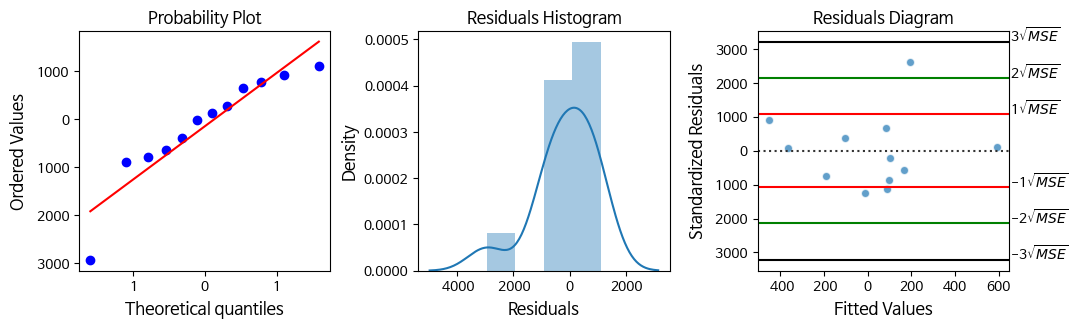

In [22]:
reg_diagnosis(arima_resid, arima_pred, y_valid['총인구'])

####보류된 검정 코드

In [ ]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

print('Augmented Dickey-Fuller 검정')
print(adfuller(resid))
if adfuller(resid)[1] > 0.05:
    print("\n잔차는 정상 과정이 아닙니다.")
else:
    print("\n잔차는 정상 과정입니다.")

print('\nKPSS 검정')
print(kpss(resid))
if kpss(resid)[1] < 0.05:
    print("\n잔차는 정상 과정이 아닙니다.")
else:
    print("\n잔차는 정상 과정입니다.")

Augmented Dickey-Fuller 검정
(-3.4603362240831124, 0.00906612519326395, 1, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 121.94233574539231)

잔차는 정상 과정입니다.

KPSS 검정
(0.1060595454359342, 0.1, 1, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

잔차는 정상 과정입니다.


<ipython-input-48-aa31646a1494>:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  print(kpss(resid))
<ipython-input-48-aa31646a1494>:13: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  if kpss(resid)[1] < 0.05:


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

print('Ljung-Box 검정 결과\n')
alpha = 0.05
lb_result = acorr_ljungbox(resid, lags=11)
print(lb_result)
p_values = lb_result['lb_pvalue']
significant_lags = np.where(p_values < alpha)[0] + 1  # 유의미한 시차 구하기
if len(significant_lags) > 0:
    print("\n잔차는 White Noise가 아닙니다.")
    print(f"유의미한 자기상관이 발견된 시차: {significant_lags}")
else:
    print("\n잔차는 White Noise입니다.")

Ljung-Box 검정 결과

     lb_stat  lb_pvalue
1   0.534281   0.464812
2   2.908000   0.233634
3   3.938510   0.268181
4   3.949959   0.412821
5   4.199946   0.521003
6   4.323031   0.633050
7   4.323084   0.741903
8   4.502813   0.809152
9   4.986800   0.835457
10  5.067608   0.886616
11  5.305538   0.915471

잔차는 White Noise입니다.


<ipython-input-19-d25d77a8d9d5>:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


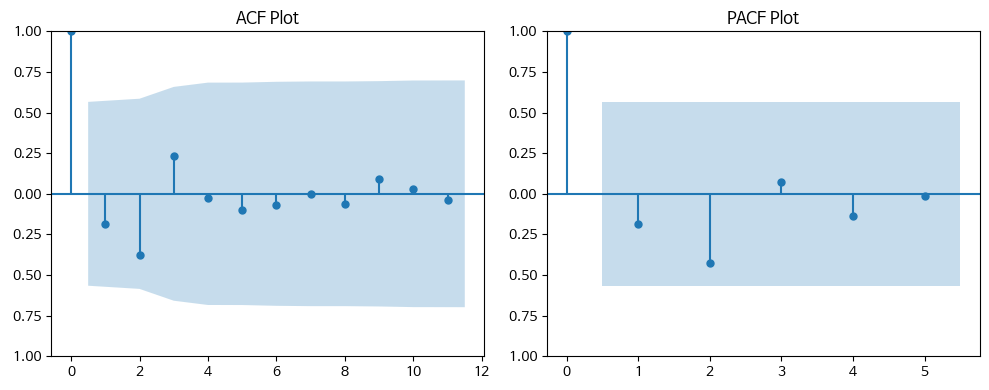

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# ACF 그래프
plot_acf(resid, lags=11, ax=axes[0])
axes[0].set_title('ACF Plot')

# PACF 그래프
plot_pacf(resid, lags=5, ax=axes[1])
axes[1].set_title('PACF Plot')

plt.tight_layout()
plt.show()